In [2]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import sys
sys.path
sys.path.append('../models')
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp
%matplotlib inline

In [3]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [4]:
def plot_and_save_dict(d,title,save_title,save=False,i=None,ax=None):
    x =get_to_plot_actions(d['actions'])
    print(np.array(x[100:]).mean())
    #plt.figure(1) 
    #ax[0][i].ylim(.45,1)
    #ax[0][i].yticks(np.arange(.45, 1, step=0.15))
    ax[0][i].plot(x)
    
    plt.ylabel('Percent correct action rho*')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_percent_correct_action.png'.format(save_title,title))
    to_plotr =  get_to_plot_regrets(d['regrets'])
    #plt.figure(2) 
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
    #ax[1][i].plot(to_plotr)
    #plt.ylabel('Regret')
    #plt.xlabel('Decision times')
    #plt.title(title)
    #if save:
    #    plt.savefig('{}_{}_regret.png'.format(save_title,title))

In [54]:
with open('../../Downloads/cases_to_plot_base_515.pkl','rb') as f:
    pooled = pickle.load(f)

In [23]:
 pooled['case_three'].keys()

dict_keys(['steps', 'regrets', 'actions'])

In [224]:
steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]


In [52]:
with open('../../Downloads/to_save_personalized_515.pkl','rb') as f:
    personalized = pickle.load(f)

In [53]:
with open('../../Downloads/to_save_batch_515.pkl','rb') as f:
    batch = pickle.load(f)

In [41]:
def plot_all_special_actions():
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[:],  yticks = np.arange(.4, .85, step=0.15),ylim = [.4,.85])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 5
    for i in range(len(cases)):
            if i==0:
                #plt.setp(ax[0],  yticks = np.arange(0, .15, step=0.05),ylim = [0,.15])
                ax[i].set_ylabel('Average Action')
            if i==1:
                
                #plt.setp(ax[1],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
                ax[i].set_xlabel('Decision times')
            #if i==2:
                #plt.setp(ax[2],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
            ax[i].set_title(titles[i])
            
            b =get_to_plot_actions(batch[cases[i]]['actions'])
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            
            ax[i].plot([b[j] for j in range(0,len(b),offset)],'o-',label='Complete')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_to_plot_actions(personalized[cases[i]]['actions'])
            ax[i].plot([p[j] for j in range(0,len(p),offset)],'+-',label='Person-specific')
         
            po =get_to_plot_actions(pooled[cases[i]]['actions'])
            ax[i].plot([po[j] for j in range(0,len(po),offset)],label='IntelligentPooling')
            xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            print([j for j in range(0,len(b),offset)])
            xx = [20, 40, 60, 80]
            labels = ['{}'.format(i) for i in [100,200,300,400] ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax[i].set_xticks(xx)
            ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('location_pretreatment_regret_12weeks',dpi=300, bbox_inches='tight')

In [61]:
def plot_all_special_regret():
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    #plt.setp(ax[:],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 5
    for i in range(len(cases)):
            if i==0:
                plt.setp(ax[0],  yticks = np.arange(0, .15, step=0.05),ylim = [0,.15])
                ax[i].set_ylabel('Average regret')
            if i==1:
                
                plt.setp(ax[1],  yticks = np.arange(0.05, .2, step=0.01),ylim = [0.05,.2])
                ax[i].set_xlabel('Decision times')
            if i==2:
                plt.setp(ax[2],  yticks = np.arange(0.05, .2, step=0.01),ylim = [0.05,.2])
            ax[i].set_title(titles[i])
            
            b =get_to_plot_actions(batch[cases[i]]['regrets'])
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            
            ax[i].plot([b[j] for j in range(0,len(b),offset)],'o-',label='Complete')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_to_plot_actions(personalized[cases[i]]['regrets'])
            ax[i].plot([p[j] for j in range(0,len(p),offset)],'+-',label='Person-specific')
         
            po =get_to_plot_actions(pooled[cases[i]]['regrets'])
            ax[i].plot([po[j] for j in range(0,len(po),offset)],label='IntelligentPooling')
            xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            #print([j for j in range(0,len(b),offset)])
            xx = [20, 40, 60, 80]
            labels = ['{}'.format(i) for i in [100,200,300,400] ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax[i].set_xticks(xx)
            ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('location_pretreatment_regret_12weeks',dpi=300, bbox_inches='tight')

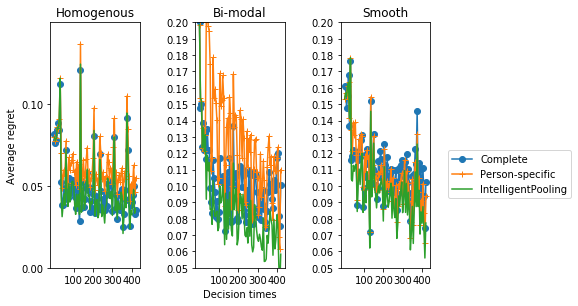

In [62]:
plot_all_special_regret()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210

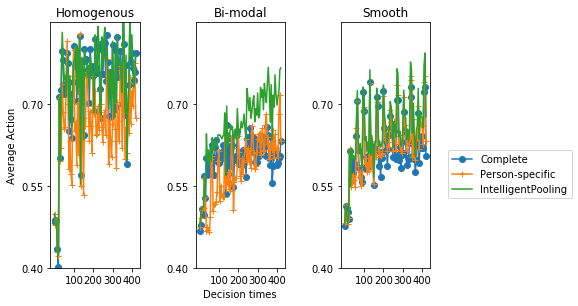

In [55]:
plot_all_special_actions()

In [231]:
def plot_all_skewed():
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_three']
    plt.setp(ax,  yticks = np.arange(.3, 1, step=0.15),ylim = [.45,.9])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    titles = ['Smooth']
    offset = 1
    for i in range(len(cases)):
            if i==0:
                ax.set_ylabel('Percent correct action chosen $\\rho^*$')
            if i==0:
                ax.set_xlabel('Decision times')
            ax.set_title(titles[i])
            
            b =get_to_plot_actions(batch[cases[i]]['actions'])
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            
            ax.plot([b[j] for j in range(0,len(b)-300,offset)],'o-',label='Complete')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_to_plot_actions(personalized[cases[i]]['actions'])
            ax.plot([p[j] for j in range(0,len(p)-300,offset)],'+-',label='Person-specific')
         
            po =get_to_plot_actions(pooled[cases[i]]['actions'])
            ax.plot([po[j] for j in range(0,len(po)-300,offset)],label='IntelligentPooling')
            xx=[i for i in range(int(len([b[j]-300 for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            labels = ['{}'.format(i*offset) for i in xx ]
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax.set_xticks(xx)
            ax.set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('location_pretreatment_percent_action_12weeks_skewed',dpi=300)

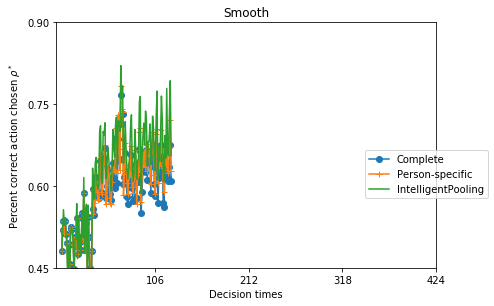

In [232]:
plot_all_skewed()

In [64]:
.325**.5

0.570087712549569

In [10]:
def plot_all_s():
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[:],  yticks = np.arange(.3, 1, step=0.15),ylim = [0,1])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 10
    for i in range(len(cases)):
            
            if i==0:
                
                ax[i].set_ylabel('Percent correct action chosen $\\rho^*$')
            if i==1:
                ax[i].set_xlabel('Decision times')
            ax[i].set_title(titles[i])
            
            b =get_to_plot_actions(batch[cases[i]]['actions'])
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            
            ax[i].plot([b[j] for j in range(0,len(b[100:400]),offset)],'o-',label='Complete')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_to_plot_actions(personalized[cases[i]]['actions'])
            ax[i].plot([p[j] for j in range(0,len(p[100:400]),offset)],'+-',label='Person-specific')
         
            po =get_to_plot_actions(pooled[cases[i]]['actions'])
            ax[i].plot([po[j] for j in range(0,len(po[100:400]),offset)],label='IntelligentPooling')
            xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            #print([j for j in range(0,len(b),offset)])
            #xx = [20, 40, 60, 80]
            #labels = ['{}'.format(i) for i in [100,200,300,400] ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            #ax[i].set_xticks(xx)
            #ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
   # plt.savefig('location_pretreatment_percent_action_12weeks',dpi=300, bbox_inches='tight')



